In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('../../../CWR_fig/credit-card-fraud-detection/Base.csv')

In [3]:
df['device_os'].sample(10)

330294    windows
318979      linux
647030      other
509809      other
283078      linux
378474      linux
209038    windows
985233      linux
893009      other
214909      other
Name: device_os, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
sum(df['fraud_bool'])

11029

In [6]:
df.loc[df['fraud_bool']==True,:].describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,11029.0,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,...,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.0,11029.000000
mean,1.0,0.686635,0.393161,5.861365,114.801161,40.858645,1.054615,3.962009,1622.311542,5183.913444,...,0.850576,10.469580,0.084414,833.986762,0.050322,8.229520,0.341645,1.079427,0.0,3.565962
std,0.0,0.265579,0.295607,32.816956,85.324351,13.086334,5.707977,16.622067,1005.687071,2902.298679,...,0.356522,12.875992,0.278020,643.287556,0.218618,9.681103,0.474283,0.320447,0.0,2.312055
min,1.0,0.100000,0.000132,-1.000000,-1.000000,10.000000,0.000001,-8.249792,18.000000,64.422571,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,1.0,0.600000,0.134257,-1.000000,53.000000,30.000000,0.005911,-1.195618,909.000000,2894.349366,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.249171,0.000000,1.000000,0.0,2.000000
50%,1.0,0.800000,0.292420,-1.000000,94.000000,40.000000,0.013094,-0.900578,1328.000000,4916.464728,...,1.000000,2.000000,0.000000,500.000000,0.000000,5.121820,0.000000,1.000000,0.0,4.000000
75%,1.0,0.900000,0.676543,-1.000000,156.000000,50.000000,0.023265,-0.562268,2050.000000,7128.603281,...,1.000000,25.000000,0.000000,1500.000000,0.000000,8.628160,1.000000,1.000000,0.0,6.000000
max,1.0,0.900000,0.999953,357.000000,392.000000,90.000000,75.495921,111.321272,6368.000000,16084.617170,...,1.000000,31.000000,1.000000,2100.000000,1.000000,77.730242,1.000000,2.000000,0.0,7.000000


<Axes: xlabel='month', ylabel='Count'>

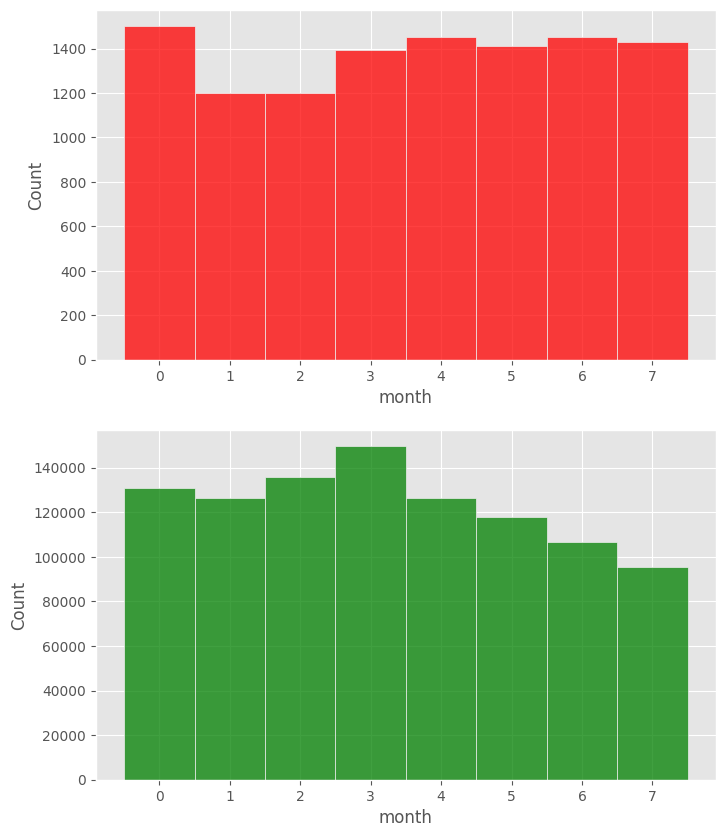

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(data=df.loc[df['fraud_bool']==True,'month'],color="red",ax=axes[0],bins = 16, element = 'bars',discrete=True)
sns.histplot(data=df.loc[df['fraud_bool']==False,'month'],color="green",ax = axes[1],bins = 16, element = 'bars',discrete=True)

<Axes: xlabel='income', ylabel='Density'>

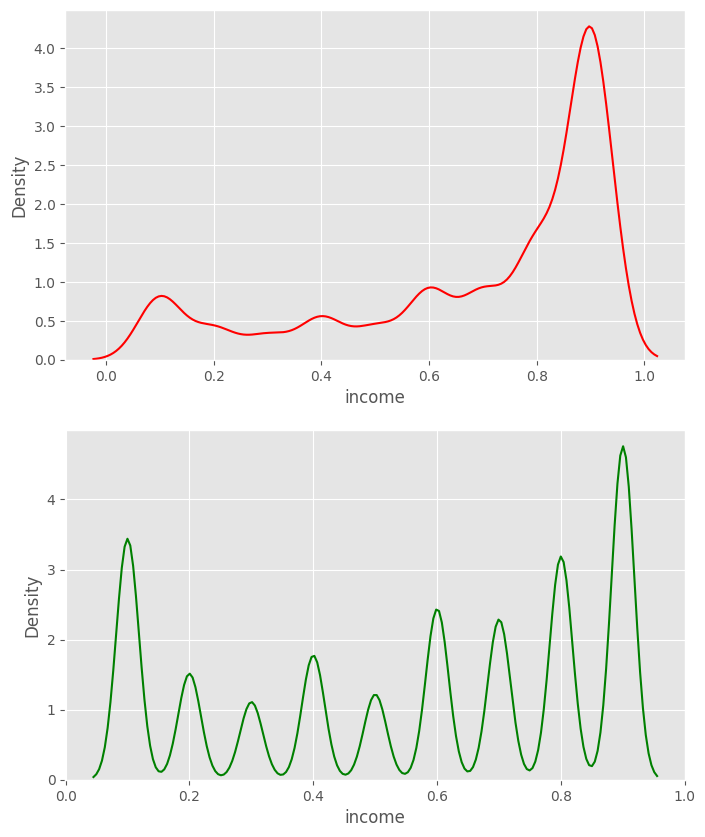

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.kdeplot(data=df.loc[df['fraud_bool']==True,'income'],color="red",ax=axes[0])
sns.kdeplot(data=df.loc[df['fraud_bool']==False,'income'],color="green",ax=axes[1])

<Axes: ylabel='income'>

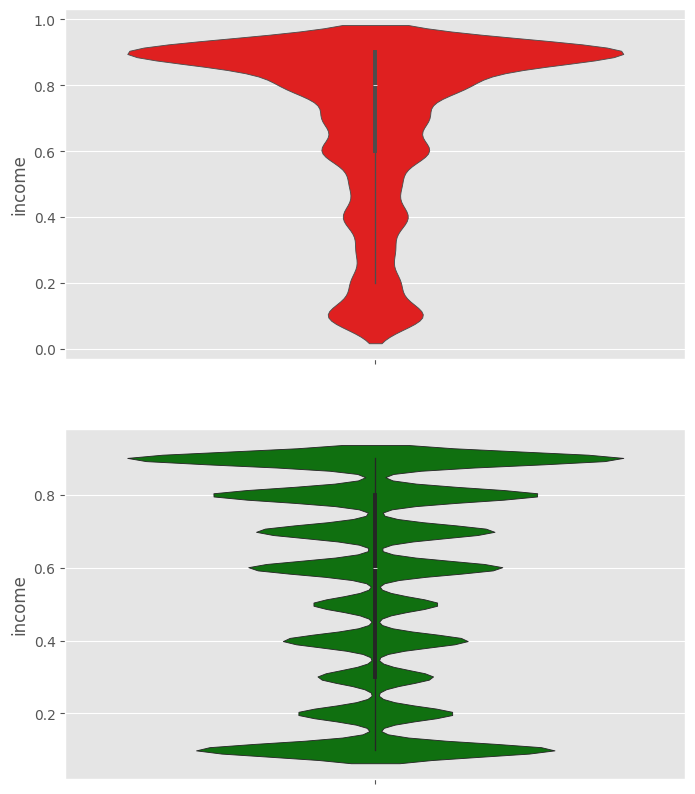

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.violinplot(data=df.loc[df['fraud_bool']==True,'income'],color="red",ax=axes[0])
sns.violinplot(data=df.loc[df['fraud_bool']==False,'income'],color="green",ax=axes[1])

In [10]:
#Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['fraud_bool'].value_counts()[1]
notfraud = df['fraud_bool'].value_counts()[0]

print("The ratio of fraud{0} to notfraud{1} is:{2}".format(fraud,notfraud,fraud/notfraud))

The ratio of fraud11029 to notfraud988971 is:0.011151995356790038


In [11]:
# Drop the 'device_fraud_count' column not used
df = df.drop(columns=['device_fraud_count'])

<Axes: >

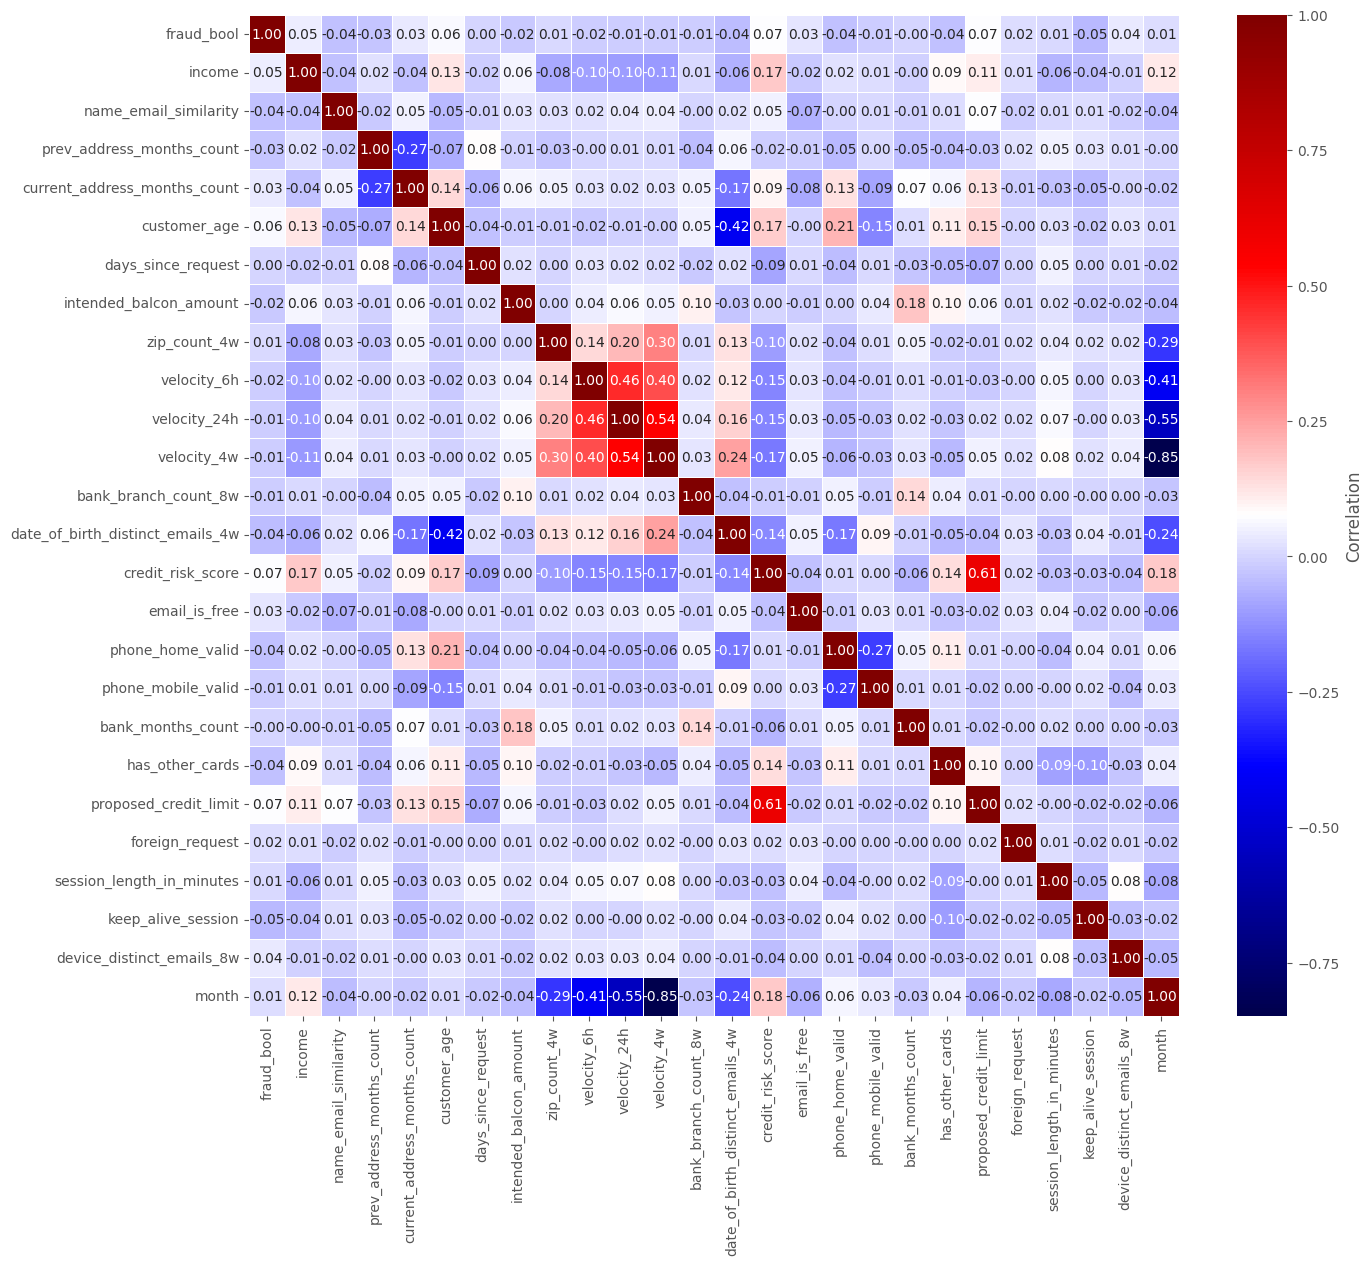

In [12]:
plt.figure(figsize=(15, 13))
sns.heatmap(data=df.select_dtypes(include=[np.number]).corr(),cmap="seismic", annot=True,fmt=".2f", 
            cbar_kws={'label': 'Correlation'}, linewidths=0.5)

In [13]:
df_blind = df.select_dtypes(include=[np.number]).drop(columns=['fraud_bool'])
label = df['fraud_bool']

In [14]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(df_blind, label
                                                          , test_size=0.2
                                                          , stratify=df['fraud_bool']
                                                          , random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.25
                                                  , stratify=y_trainval
                                                  , random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [17]:
from imblearn.under_sampling import RandomUnderSampler
# Undersampling will be utilized to address the issue of imbalanced classes.

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

# Undersample the validation set
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)

In [30]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
print(C)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000,class_weight='balanced')
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

[1.00000000e+00 2.15443469e+01 4.64158883e+02 1.00000000e+04
 2.15443469e+05 4.64158883e+06 1.00000000e+08 2.15443469e+09
 4.64158883e+10 1.00000000e+12]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 2/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 1/5; 2/10] START C=21.544346900318832, penalty=l2...........................[CV 3/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 4/5; 1/10] START C=1.0, penalty=l2..........................................

[CV 3/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 2/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 5/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 5/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.839 total time=   0.1s
[CV 3/5; 1/10] END ...........C=1.0, penalty=l2;, score=

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

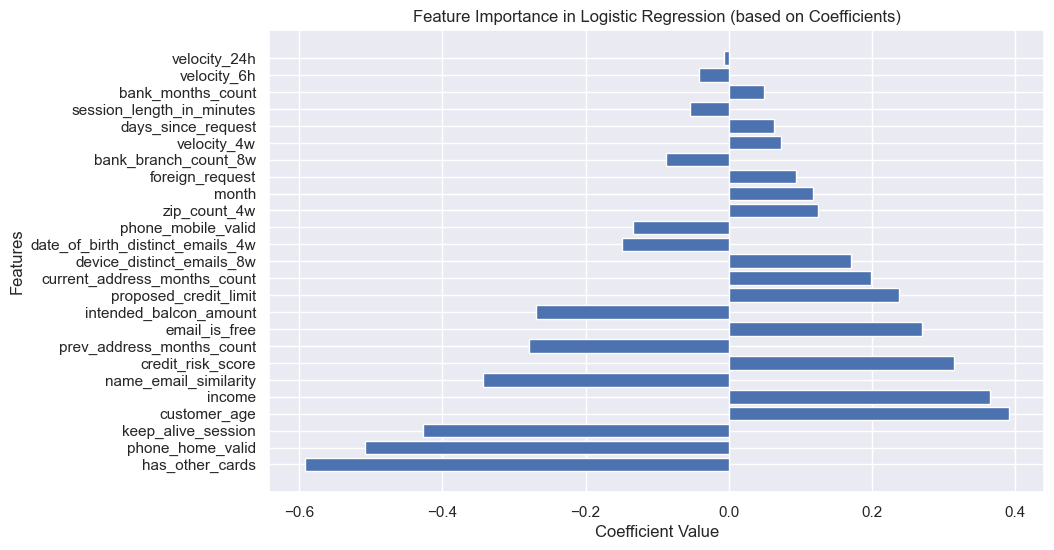

In [56]:
import matplotlib.pyplot as plt
import numpy as np


best_model = logistic_grid.best_estimator_  


if hasattr(best_model, 'coef_'):
    coefficients = best_model.coef_[0]  
        
    features = np.array(list(df_blind.columns))  
    
    sorted_idx = np.argsort(np.abs(coefficients))[::-1]  
    sorted_features = features[sorted_idx]
    sorted_coefficients = coefficients[sorted_idx]

    # 绘制系数的重要性图
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_coefficients)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Feature Importance in Logistic Regression (based on Coefficients)")
    plt.show()
else:
    print("该模型没有 coef_ 属性")


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

In [31]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier(class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 5/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 2/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 3/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 4/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 3/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 1/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 2/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 2/5; 1/24] END max_depth=5, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

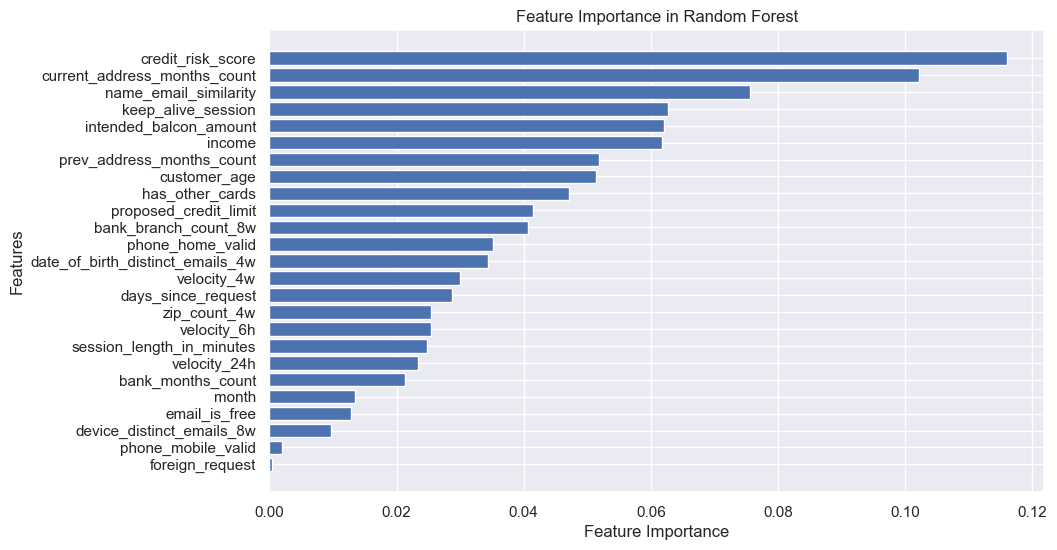

In [54]:
best_model = rf_grid.best_estimator_
feature_importances = best_model.feature_importances_
features = np.array(list(df_blind.columns)) 

sorted_idx = np.argsort(feature_importances)[::-1]  
sorted_features = features[sorted_idx][::-1]
sorted_importances = feature_importances[sorted_idx][::-1]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

In [51]:
print (list(df_blind.columns))

['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


In [21]:
from sklearn.dummy import DummyClassifier
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

In [32]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

def plot_roc_curves(X, y, models, model_names, figsize=(20,18)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)
#     plt.show()

In [33]:
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

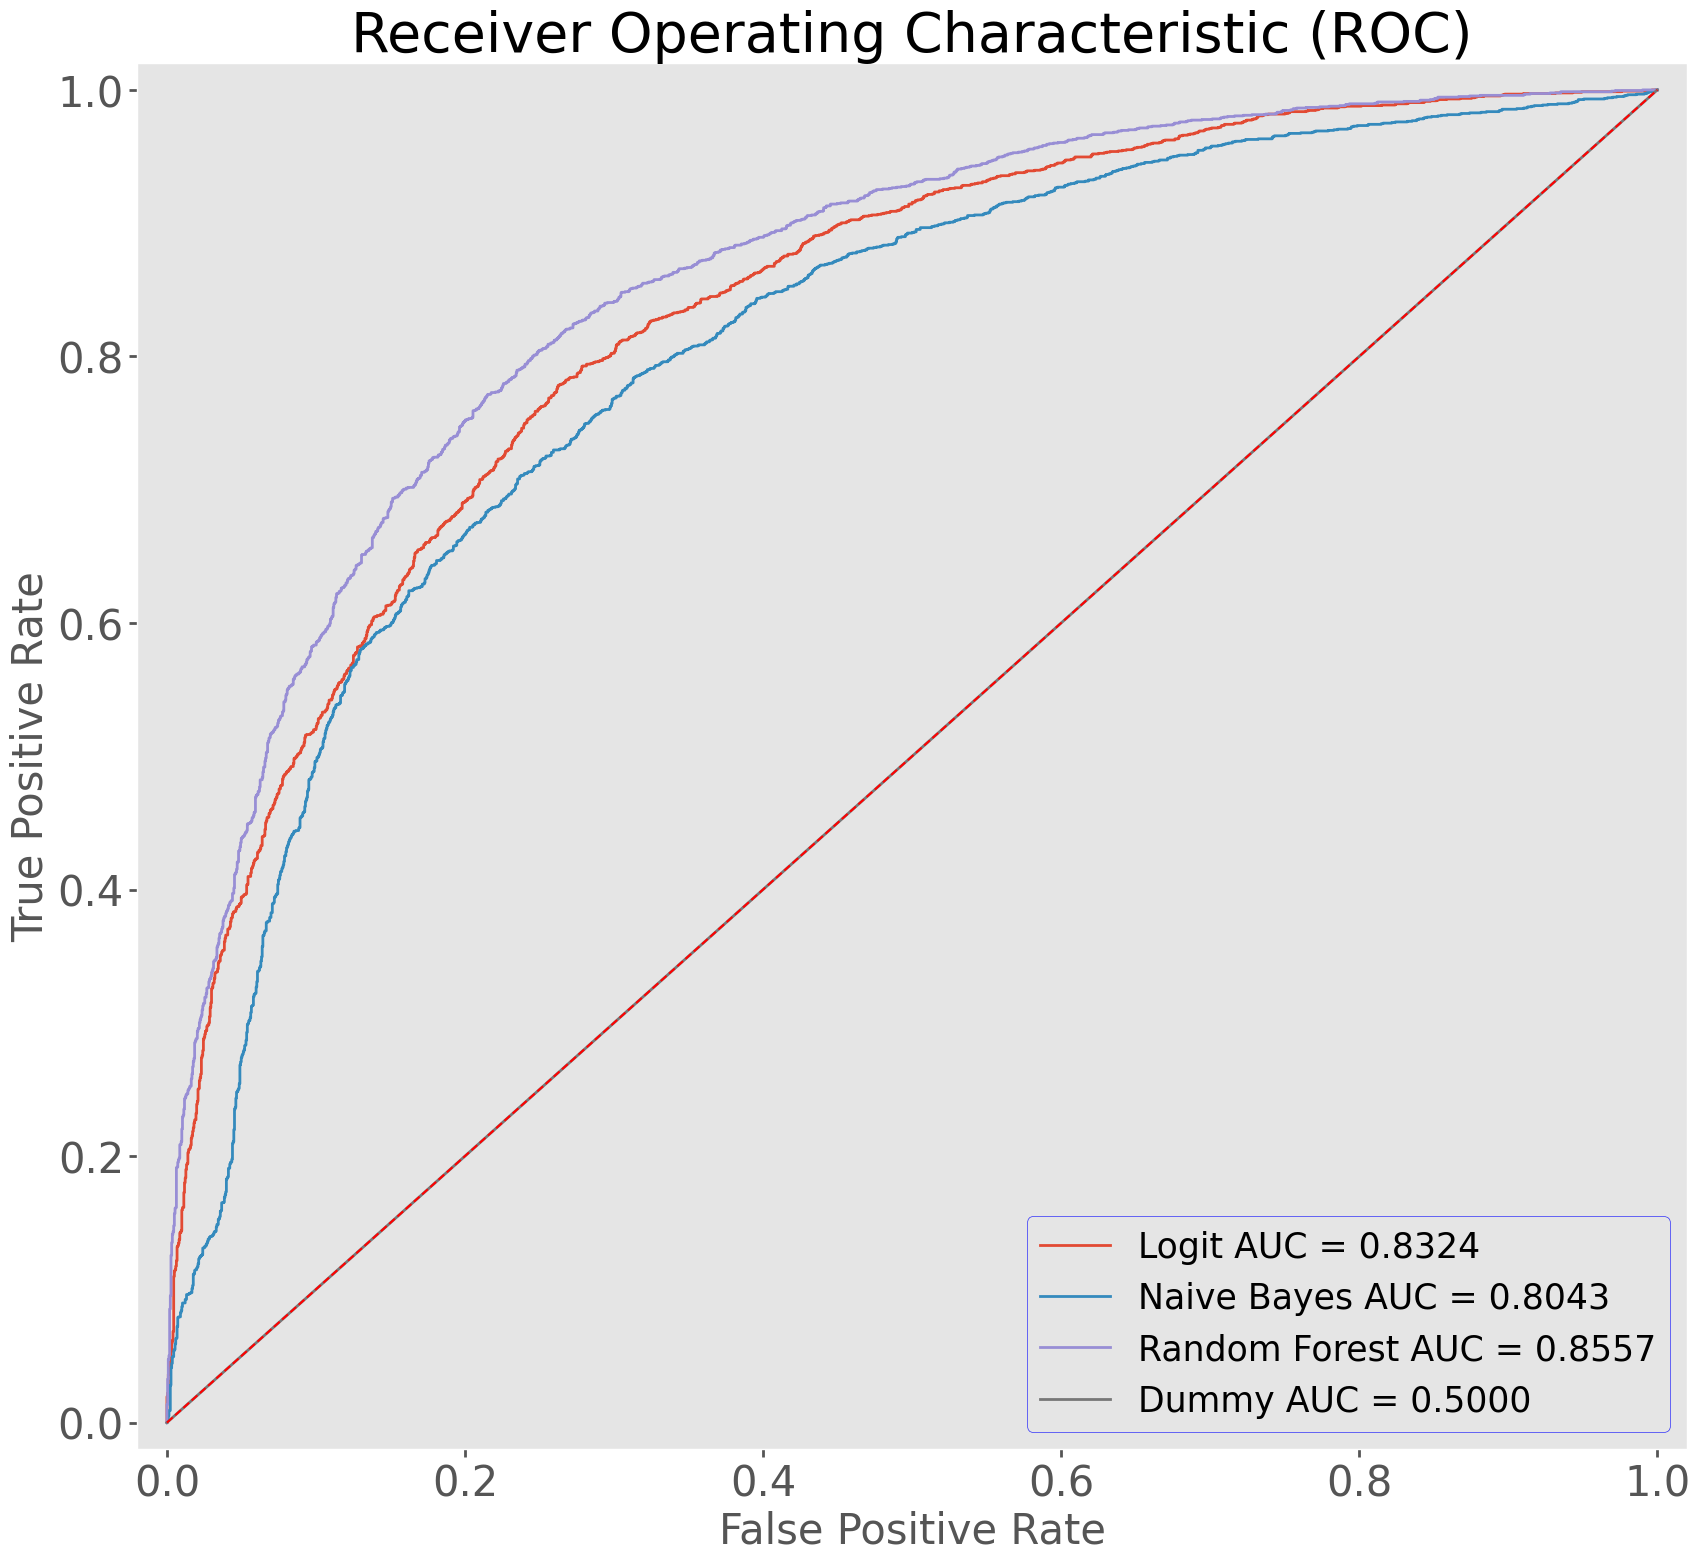

In [34]:
# Plot ROC curves for in-sample data
plot_roc_curves(X_val_under, y_val_under, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_insample.png');

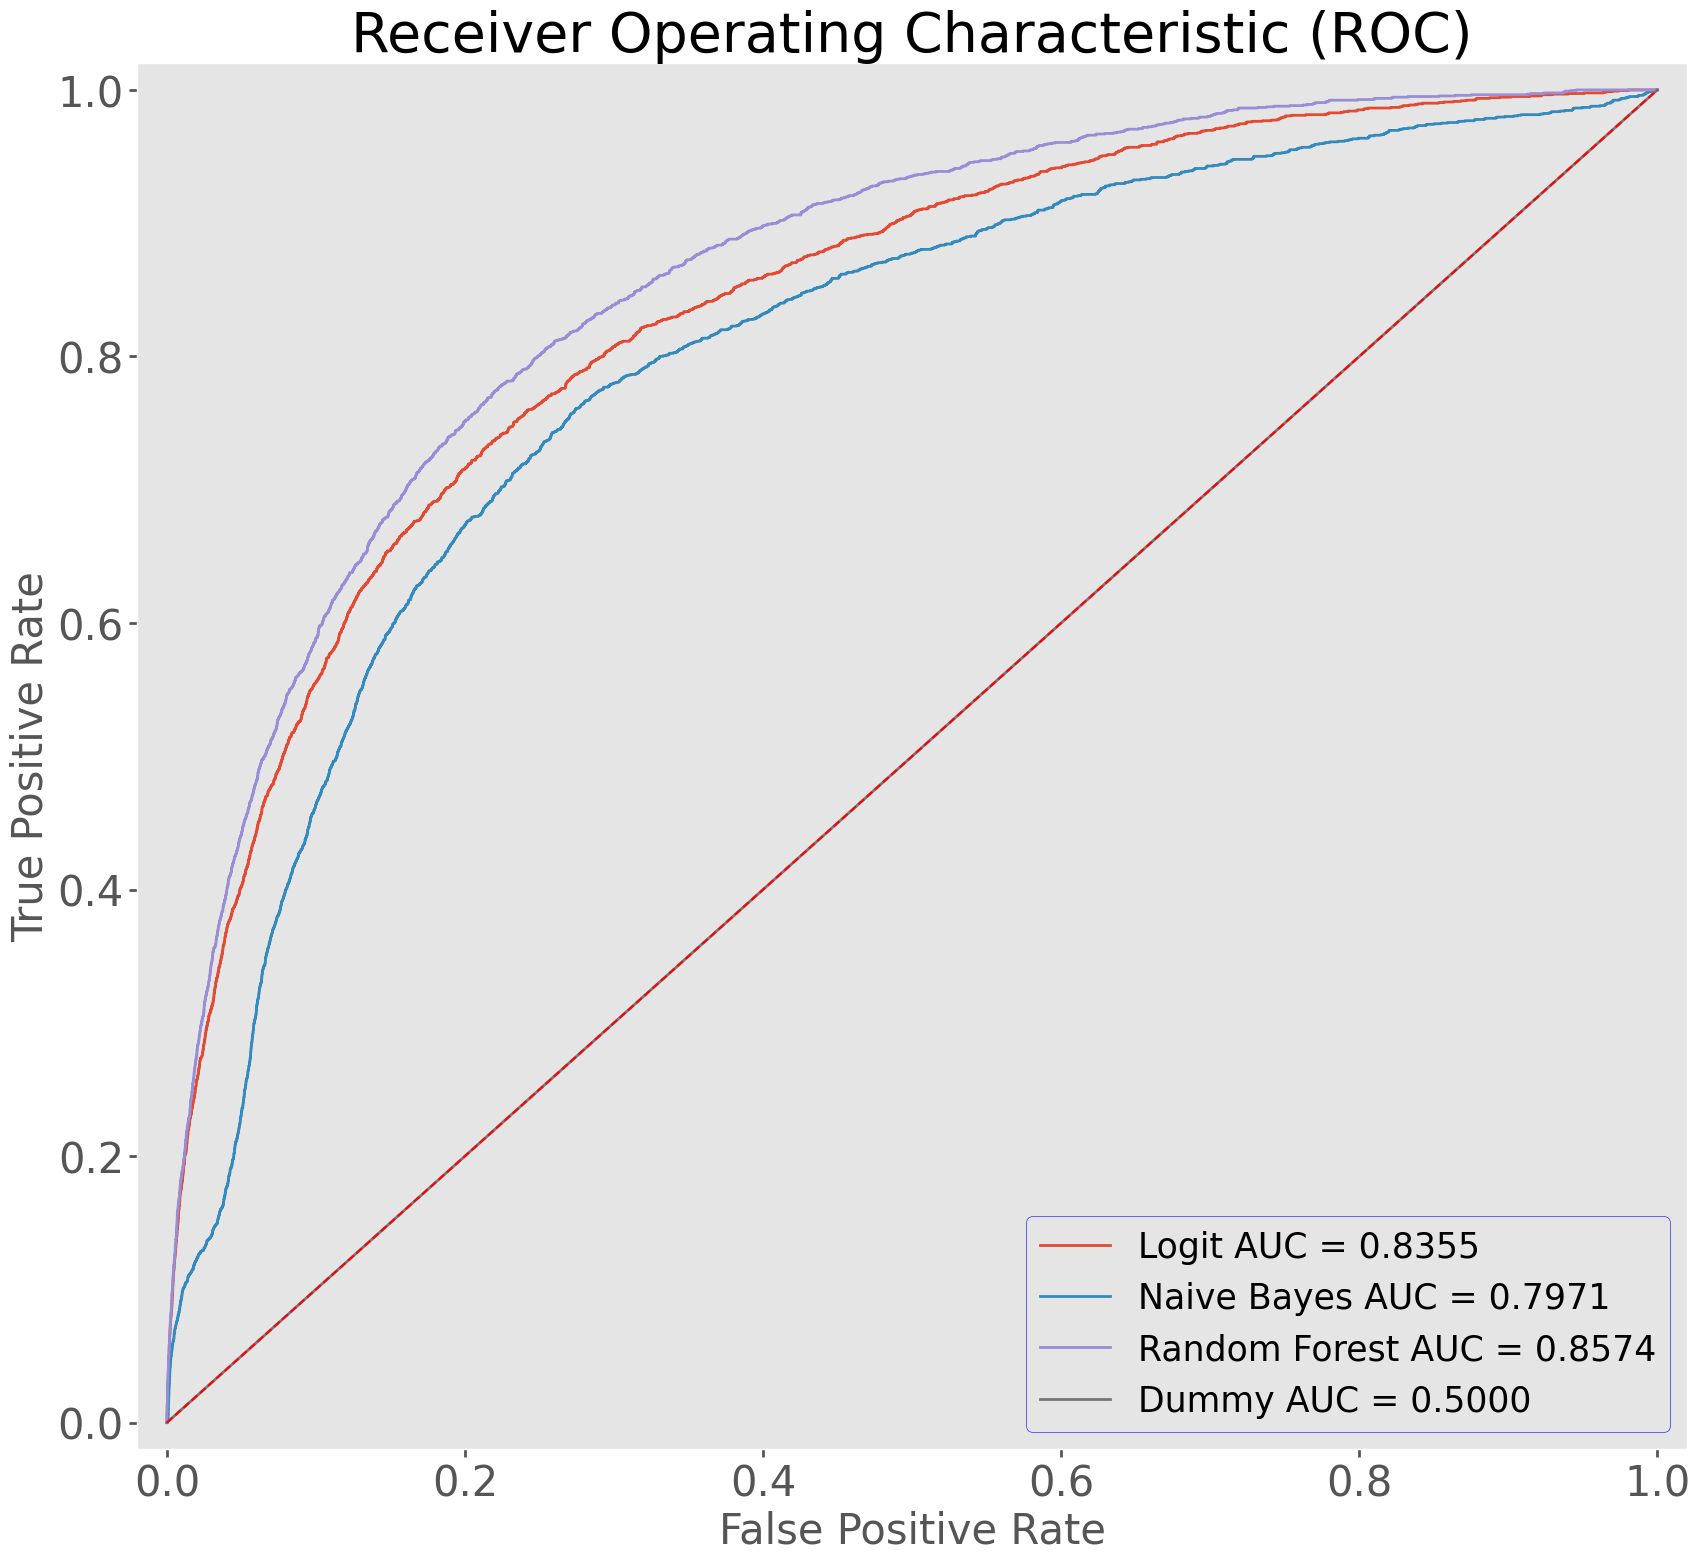

In [35]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_outsample.png');

In [36]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val_under, y_predict)
        acc = accuracy_score(y_val_under, y_predict)
        rec = recall_score(y_val_under, y_predict)
        pre = precision_score(y_val_under, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [37]:
# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]

In [38]:
# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.421053,0.765777,0.749320,0.819583,0.718601
1,Naive-Bayes,0.157895,0.751759,0.720082,0.847688,0.675334
2,Random Forest,0.421053,0.784899,0.764959,0.857661,0.723518


In [39]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


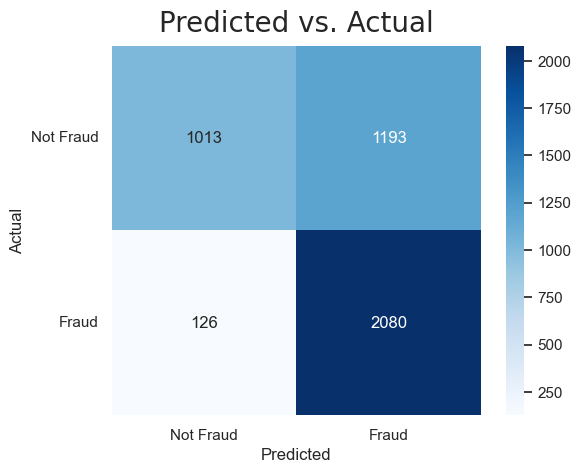

In [61]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(rf_grid, threshold=0.4210)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_random_forest.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


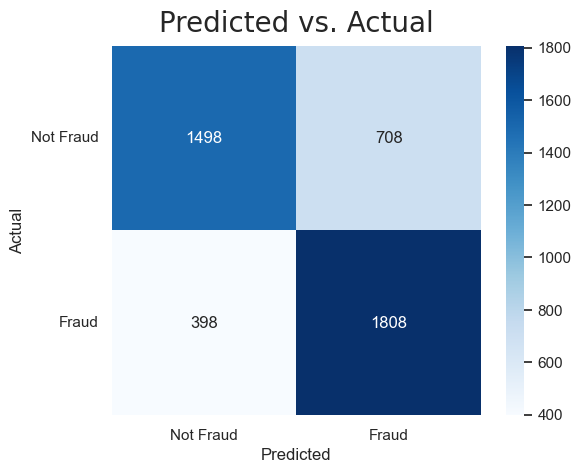

In [42]:
# Create a confusion matrix for the Logistic Regression model with a threshold of 0.842 on the validation data
make_confusion_matrix_val(logistic_grid, threshold=0.421053)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_logistic_regression.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


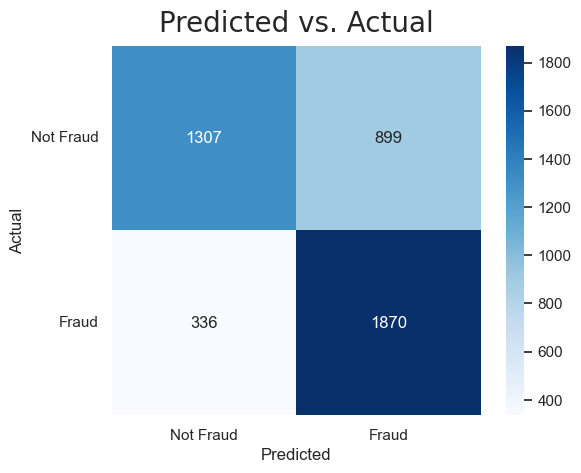

In [43]:
make_confusion_matrix_val(gnb_best, threshold=0.157895)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_GaussianNB.png');

In [57]:
def make_confusion_matrix_test(model, threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)

    # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])

    # Calculate TP, FP, FN, TN
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]

    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontname='.SF Compact Display', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


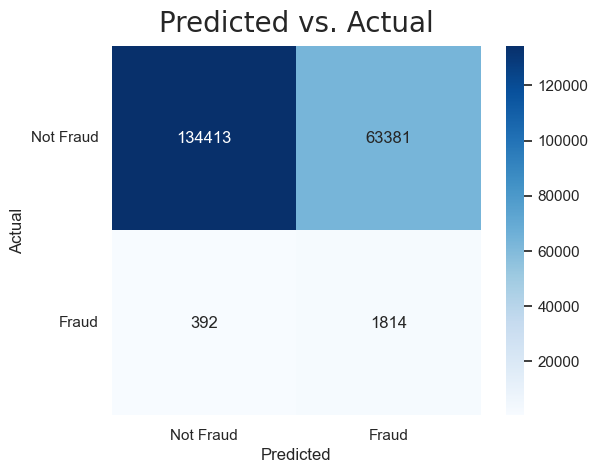

In [60]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


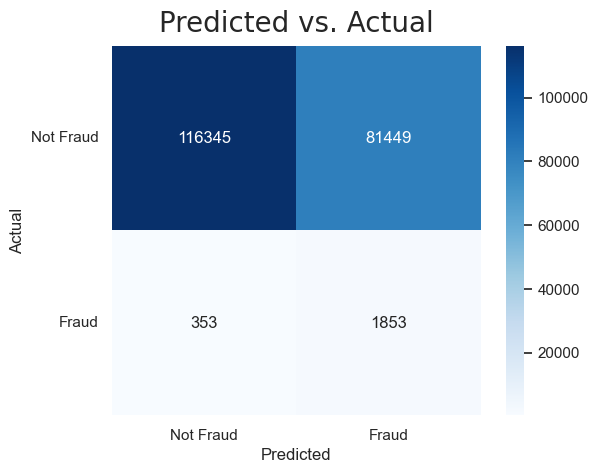

In [62]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(gnb, threshold=0.157895)

# Save the plot as PNG file
plt.savefig('confusion_matrix_navie_bayes.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


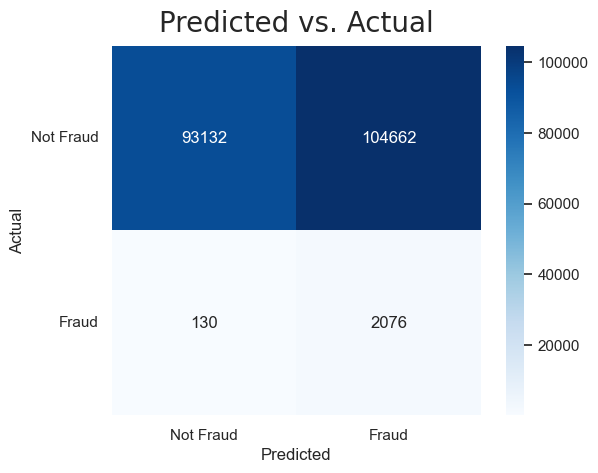

In [63]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.3)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');

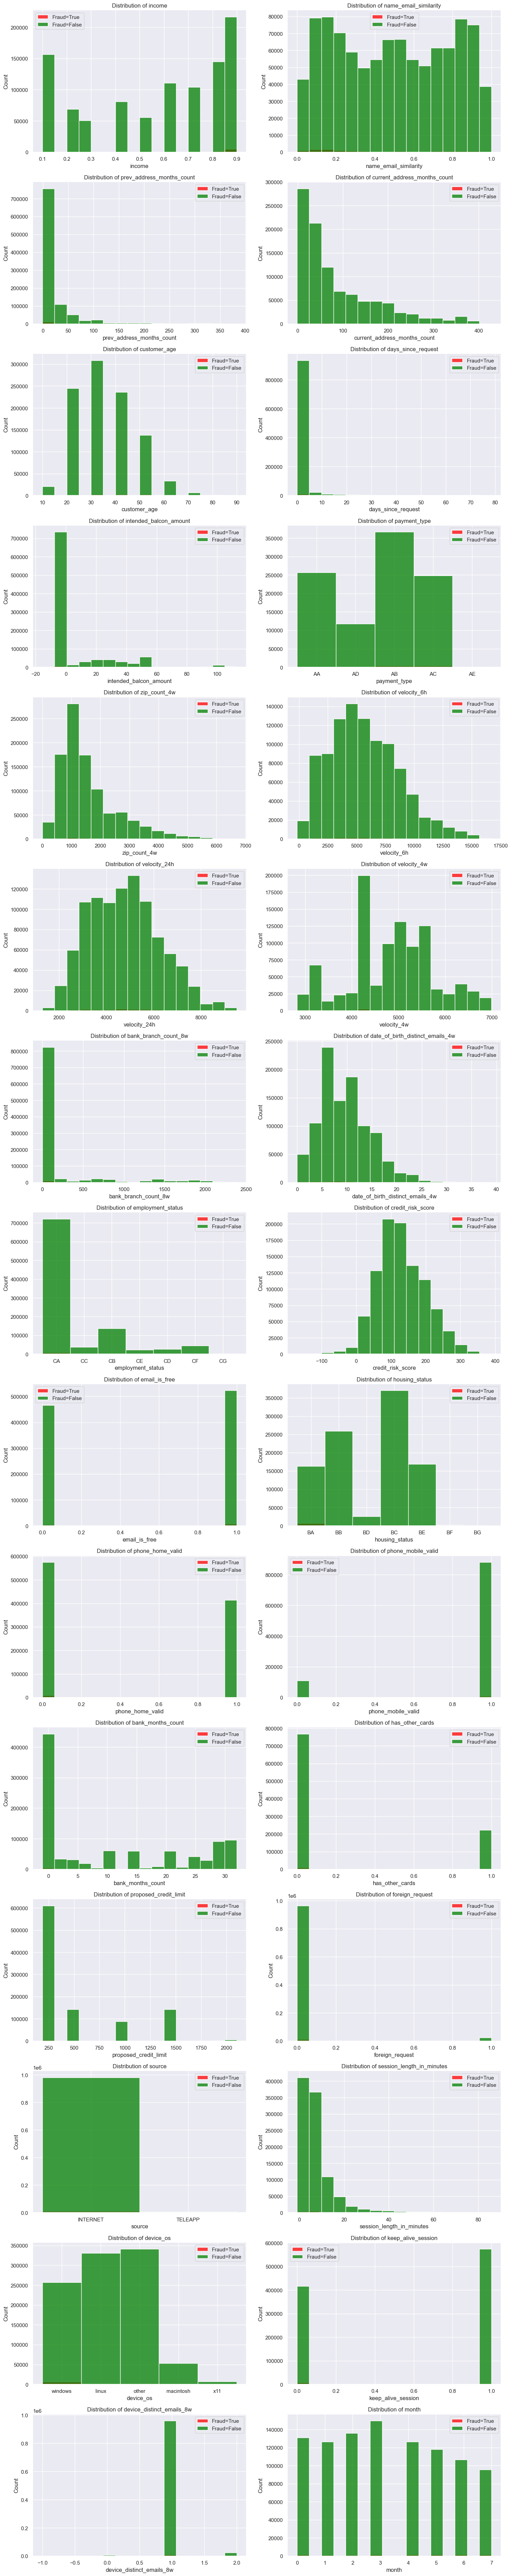

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 是你的数据集，包含 'fraud_bool' 和其他特征

# 选择你想要对比的变量（排除 'fraud_bool'）
features = [col for col in df.columns if col != 'fraud_bool']

# 设置图形的布局参数（这里假设每行展示 2 个图）
ncols = 2
nrows = len(features) // ncols + int(len(features) % ncols != 0)  # 根据特征数量动态计算行数

# 创建子图
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))  # 调整图形大小

# 如果只有一行或一列时，避免 axes 变成一维数组
axes = axes.flatten() if len(features) > 1 else [axes]

# 遍历所有特征并绘制每个特征的对比图
for i, feature in enumerate(features):
    sns.histplot(data=df.loc[df['fraud_bool']==True, feature], color="red", ax=axes[i], bins=16, element='bars', kde=False, label='Fraud=True')
    sns.histplot(data=df.loc[df['fraud_bool']==False, feature], color="green", ax=axes[i], bins=16, element='bars', kde=False, label='Fraud=False')

    # 设置标题和图例
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

# 自动调整布局，防止标签重叠
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 选择你想要对比的变量（排除 'fraud_bool'）
features = [col for col in df.columns if col != 'fraud_bool']

# 设置图形的布局参数（这里假设每行展示 2 个图）
ncols = 2
nrows = len(features) // ncols + int(len(features) % ncols != 0)  # 根据特征数量动态计算行数

# 创建子图
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))  # 调整图形大小
axes = axes.flatten() if len(features) > 1 else [axes]

# 遍历所有特征并绘制每个特征的对比图
for i, feature in enumerate(features):
    # 计算 fraud_bool=True 和 fraud_bool=False 的比例
    fraud_true = df[df['fraud_bool'] == True][feature].value_counts(normalize=True).sort_index()
    fraud_false = df[df['fraud_bool'] == False][feature].value_counts(normalize=True).sort_index()
    
    # 将比例数据绘制为条形图
    fraud_true.plot(kind='bar', color='red', ax=axes[i], alpha=0.6, width=0.4, position=1, label='Fraud=True')
    fraud_false.plot(kind='bar', color='green', ax=axes[i], alpha=0.6, width=0.4, position=0, label='Fraud=False')
    
    # 设置标题和图例
    axes[i].set_title(f'Distribution of {feature} (Normalized)')
    axes[i].legend()

# 自动调整布局，防止标签重叠
plt.tight_layout()
plt.show()
